# Import Libraries

In [1]:
from libraries import *
from sklearn.utils import resample

# Load data

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset-pcp.csv')

# Balancing the Class

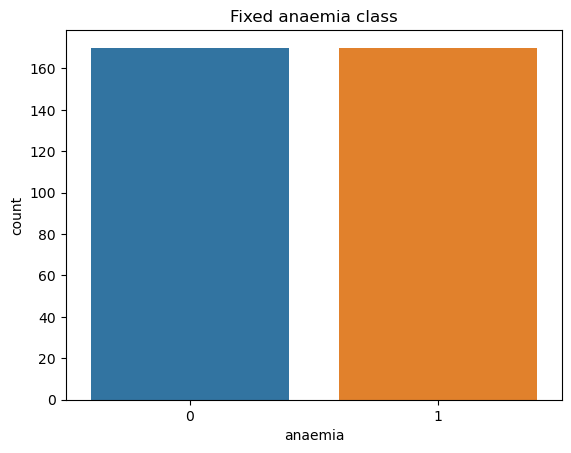

In [8]:
# Separate majority and minority classes
no_anaemia = df[df['anaemia'] == 0]
anaemia = df[df['anaemia'] == 1]

# Upsample minority class
anaemia_upsampled = resample(anaemia,
                             replace=True,
                             n_samples=len(no_anaemia),  # match number in majority class
                             random_state=27)  # reproducible results

# Combine upsampled minority class with majority class
upsampled = pd.concat([anaemia_upsampled, no_anaemia])

sns.countplot(x='anaemia', data=upsampled).set(title='Fixed anaemia class')
plt.show()

# Check new class counts
#upsampled['anaemia'].value_counts()

In [4]:
# Splitting the dataset
# labels
y = upsampled['anaemia']

# features
X = upsampled.drop('anaemia', axis=1)

# Logistic Regression and Hyperparameter tuning

In [5]:
def train_and_evaluate_logistic_regression(X, y, polynomial_degree=2, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best logistic regression model from the grid search
    best_lr = grid_search.best_estimator_

    # Apply polynomial features
    poly = PolynomialFeatures(degree=polynomial_degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Train logistic regression on the polynomial features
    best_lr.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred_poly = best_lr.predict(X_test_poly)

    # Display the classification report
    report = classification_report(y_test, y_pred_poly)
    print(f"Classification Report (with Polynomial Features):\n{report}")

    return best_lr, report

best_lr, classification_report_result = train_and_evaluate_logistic_regression(X, y)

Classification Report (with Polynomial Features):
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        32
           1       0.58      0.58      0.58        36

    accuracy                           0.56        68
   macro avg       0.56      0.56      0.56        68
weighted avg       0.56      0.56      0.56        68



# Support Vector Machine

In [6]:
def train_svm(X, y, kernel='linear', C=1.0, gamma='scale', test_size=0.2, random_state=None):

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create an SVM classifier with the specified parameters
    clf = svm.SVC(kernel=kernel, C=C, gamma=gamma)

    # Train the SVM classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    classification_rep = classification_report(y_test, y_pred)

    return clf, X_train, X_test, y_train, y_test, accuracy, classification_rep


In [10]:
trained_svm, X_train, X_test, y_train, y_test, accuracy, classification_rep = train_svm(X, y, kernel='linear', C=1.0, gamma='scale', test_size=0.2, random_state=42)
# Display classification report
print("Accuracy on the test set:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy on the test set: 0.4852941176470588
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.91      0.62        32
           1       0.57      0.11      0.19        36

    accuracy                           0.49        68
   macro avg       0.52      0.51      0.40        68
weighted avg       0.53      0.49      0.39        68



# Gaussian Naive Bayes

In [8]:
# Get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model 
naive_bayes = GaussianNB()

# Fit the model 
naive_bayes.fit(X_train, y_train)

# Get predictions on the test set 
y_hat = naive_bayes.predict(X_test)

# Display classification report
print('\nClassification Report:\n', classification_report(y_test, y_hat))



Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.28      0.40        32
           1       0.58      0.89      0.70        36

    accuracy                           0.60        68
   macro avg       0.64      0.59      0.55        68
weighted avg       0.63      0.60      0.56        68



In [9]:
# Save the trained model to a file using pickle
with open('anaemia_model.pkl', 'wb') as file:
    pickle.dump(best_lr, file)